In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


In [2]:
# Load the dataset
df = pd.read_csv("car data.csv") 
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
# Drop Car_Name column (not useful for prediction)
df = df.drop("Car_Name", axis=1)

In [16]:
# One-hot encode categorical columns
df = pd.get_dummies(
    df,
    columns=["Fuel_Type", "Selling_type", "Transmission"],
    drop_first=True
)

In [17]:
# Check for missing values
df = df.dropna()


In [18]:
# Separate features and target
X = df.drop("Selling_Price", axis=1)
y = df["Selling_Price"]


In [19]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [20]:
# Train regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [21]:
# Predict prices
y_pred = model.predict(X_test)

In [22]:
# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [23]:
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

Mean Absolute Error: 1.216374019332906
R2 Score: 0.8488707839192626


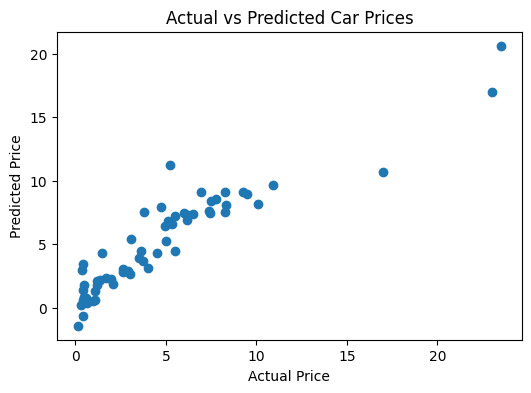

In [25]:
# Plot Actual vs Predicted prices
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()

In [27]:
df.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner',
       'Fuel_Type_1', 'Fuel_Type_2', 'Selling_type_Individual',
       'Transmission_1'],
      dtype='object')

In [35]:
important_features = [
   'Year', 'Present_Price', 'Driven_kms', 'Owner',
       'Fuel_Type_1', 'Fuel_Type_2', 'Selling_type_Individual',
       'Transmission_1']

X = df[important_features]
y = df["Selling_Price"]


In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [37]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.coef_
}).sort_values(by="Importance", ascending=False)



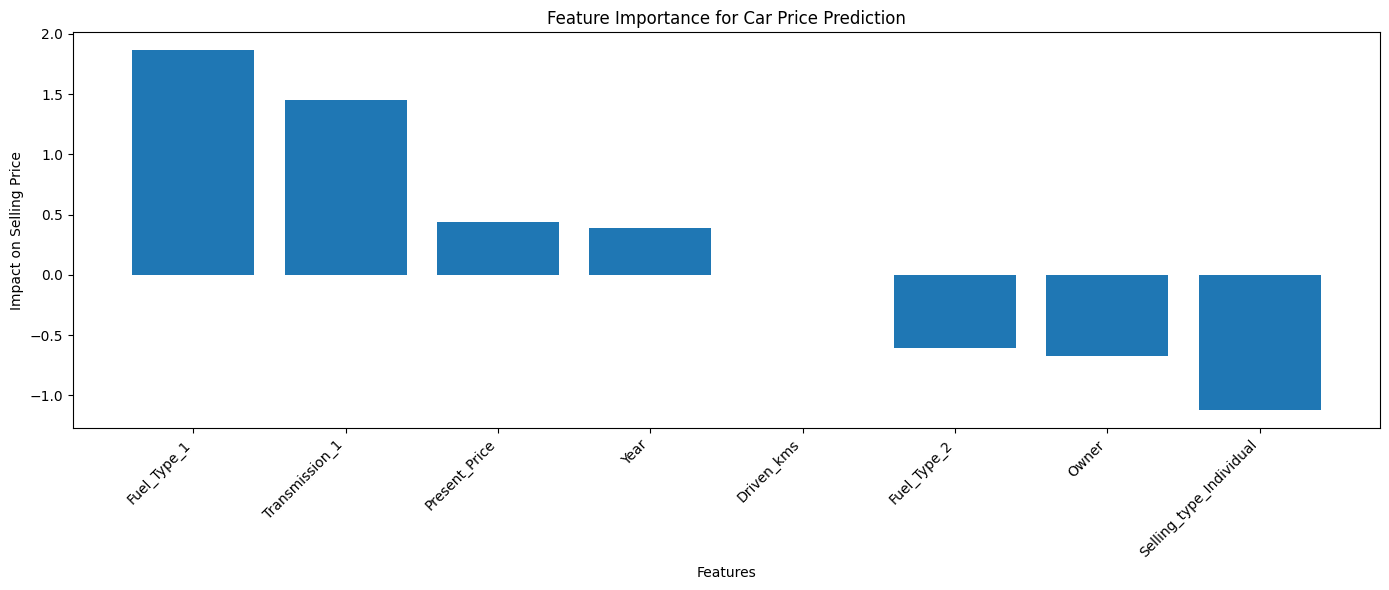

In [40]:
plt.figure(figsize=(14,6))   # bigger width

plt.bar(
    feature_importance["Feature"],
    feature_importance["Importance"]
)

plt.xticks(rotation=45, ha="right")
plt.xlabel("Features")
plt.ylabel("Impact on Selling Price")
plt.title("Feature Importance for Car Price Prediction")

plt.tight_layout()  
plt.show()
